Data shape: (70000, 785)
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


C:\Users\bonde\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9915 - loss: 0.0737 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 1.0000 - loss: 8.9746e-04 - val_accuracy: 1.0000 - val_loss: 5.0655e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 1.0000 - loss: 5.0240e-04 - val_accuracy: 1.0000 - val_loss: 3.3353e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 1.0000 - loss: 3.3408e-04 - val_accuracy: 1.0000 - val_loss: 2.4837e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 1.0000 - loss: 2.4509e-04 - val_accuracy: 1.0000 - val_loss: 1.9776e-04
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 1.0000 - loss: 2.0161e-04 - val_accuracy: 1.0000 - val_loss: 1.6426e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 1.0000 - loss: 1.6577e-04 - val_accuracy: 1.0000 - val_loss: 1.4048e-04
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━

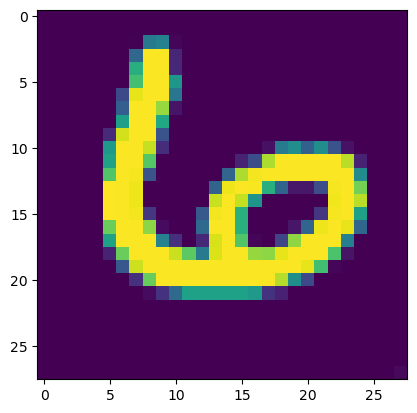

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


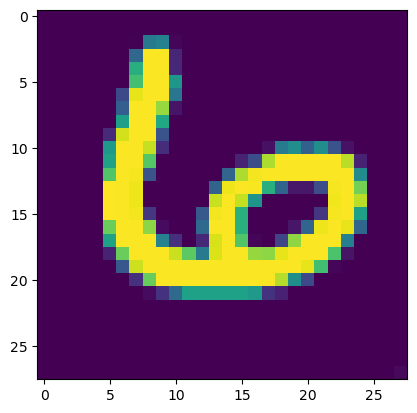

Predicted Value: 0


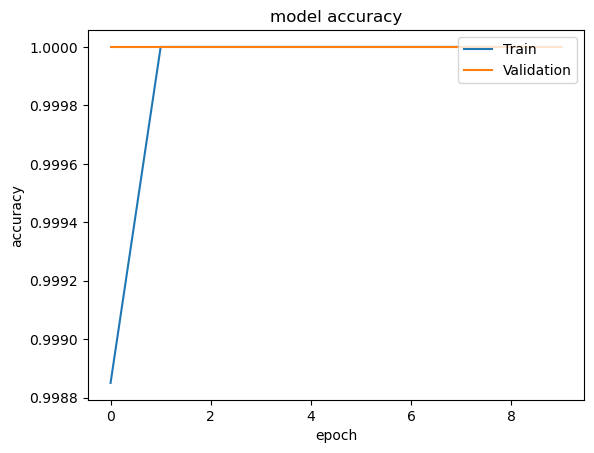

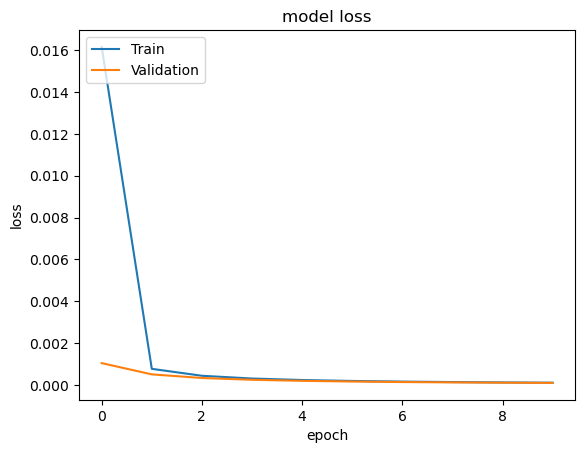

In [1]:
#a. Importing necessary packages

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam

#b. Load the training and testing data (MNIST)

# Load the data
data = pd.read_csv('mnist_784_csv.csv')
print(f"Data shape: {data.shape}")  # Expect (70000, 785)

# Split into train and test sets and normalize the pixel values (scale them to range [0,1])
x_train = data.iloc[:60000, 1:].values.astype('float32') / 255.0  # First 60000 rows as training
y_train = data.iloc[:60000, 0].values.astype('int')               # First column as labels

x_test = data.iloc[60000:, 1:].values.astype('float32') / 255.0    # Remaining rows as testing
y_test = data.iloc[60000:, 0].values.astype('int')                 # First column as labels

# Reshape for CNN (28x28 images with 1 channel)
x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

# Final shape check
print(f"x_train shape: {x_train.shape}")  # Should be (60000, 28, 28, 1)
print(f"x_test shape: {x_test.shape}")    # Should be (10000, 28, 28, 1)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]

#c. Define the network architecture using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),    
])
model.summary()

#d. Train the model using SGD
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",  
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

#e. Evaluate the network
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print('Predicted Value:', np.argmax(predicted_value[n]))

#f. Plot the training loss and accuracy
#Plotting the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

#Plotting the training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

Data shape: (70000, 785)


C:\Users\bonde\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.9957 - loss: 0.0375 - val_accuracy: 1.0000 - val_loss: 4.8876e-10
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 1.0000 - loss: 4.3272e-10 - val_accuracy: 1.0000 - val_loss: 4.8876e-10
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 1.0000 - loss: 4.4753e-10 - val_accuracy: 1.0000 - val_loss: 4.8876e-10
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 1.0000 - loss: 5.0915e-10 - val_accuracy: 1.0000 - val_loss: 4.5300e-10
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 1.0000 - loss: 5.0045e-10 - val_accuracy: 1.0000 - val_loss: 4.5300e-10
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 1.0000 - loss: 4.1997e-10 - val_accuracy: 1.0000 - val_loss: 3.6955e-10
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 1.0000 - loss: 3.2602e-10 - val_accuracy: 1.0000 - val_loss: 3.0994e-10
Epoch 8/20
1875/1875 ━━━

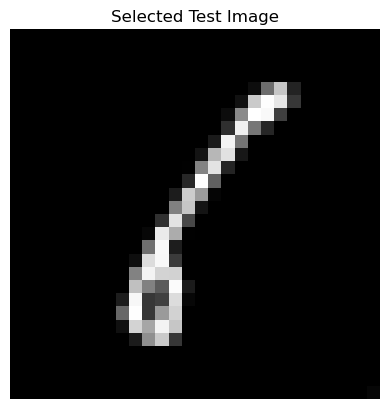

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted Value: 0


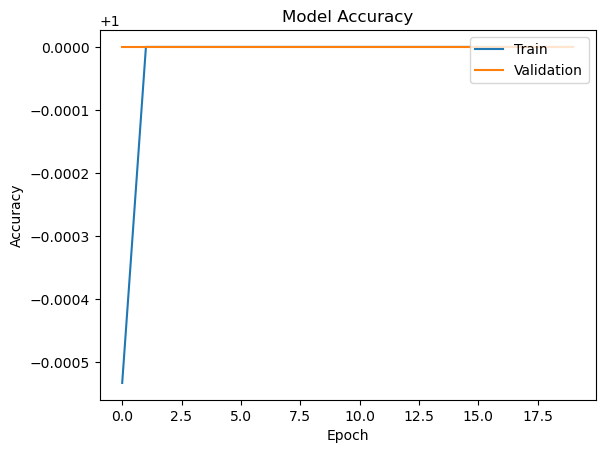

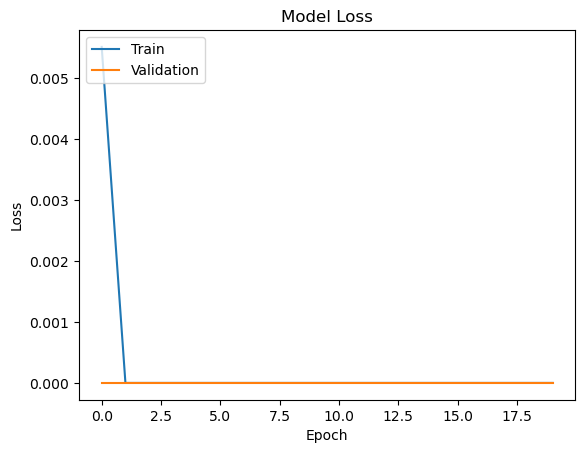

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

# Load the training and testing data (MNIST)
data = pd.read_csv('mnist_784_csv.csv')
print(f"Data shape: {data.shape}")  # Expect (70000, 785)

# Split into train and test sets and normalize the pixel values (scale them to range [0,1])
x_train = data.iloc[:60000, 1:].values.astype('float32') / 255.0  # First 60000 rows as training
y_train = data.iloc[:60000, 0].values.astype('int')               # First column as labels

x_test = data.iloc[60000:, 1:].values.astype('float32') / 255.0    # Remaining rows as testing
y_test = data.iloc[60000:, 0].values.astype('int')                 # First column as labels

# Reshape for CNN (28x28 images with 1 channel)
x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]

# Define a CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

# Compile and train the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",  
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

# Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

# Select a random image from the test set
n = random.randint(0, 9999)
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
plt.title("Selected Test Image")
plt.axis("off")
plt.show()

# Predict and display the direct value
predictions = model.predict(x_test)
predicted_value = np.argmax(predictions[n])  # Get the direct class label

print('Predicted Value:', predicted_value)

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
